In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animate
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' # Add the path of ffmpeg here!!

%matplotlib inline

Writer = animate.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

import logging
logger = logging.getLogger('matplotlib.animation')
logger.setLevel(logging.DEBUG)

In [14]:
N = 100
box = np.zeros((2*N, 2*N))
box[N, N] = 1

In [15]:
def occupy():
    '''Start site of the particle is selected.'''
    global rs
    phi = np.random.random()*2*np.pi

    rx = rs*np.cos(phi)
    ry = rs*np.sin(phi)

    return rx, ry

def check(rx, ry):
    '''Checks the status of the particle whether it 
    (1) is annihilated
    (2) has reached a site adjacent to the aggregate
    (3) do a short jump  if necessary
    (4) do a long circle jump if necessary.'''
    global N, rkill, rd
    
    x, y = int(rx//1), int(ry//1) 
    
    r = np.sqrt(x**2 + y**2)
    if r > rkill: 
        return 'k'
    if r >= rd: 
        return 'c'
    if (box[x + 1 + N][y + N] + 
        box[x - 1 + N][y + N] + 
        box[x + N][y + 1 + N] + 
        box[x + N][y - 1 + N] > 0): 
        return 'a'
    else: 
        return 'j'

def jump(rx, ry):
    '''It moves the particle to randomly adjacent site.'''
    
    random_walk = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    
    #global random_walk
    choice = np.random.randint(0,4)
    
    
    rx += random_walk[choice][0]
    ry += random_walk[choice][1]
    
    return rx, ry

def circle_jump(rx, ry):
    '''A circle jump happens when the vector of length r-rs is added to the
    position of the particle.'''
    global rs
    
    phi = np.random.random()*2*np.pi
    r = np.sqrt(rx**2 + ry**2)
    
    rx += (r-rs)*np.cos(phi)
    ry += (r-rs)*np.sin(phi)
    
    return rx, ry

def aggregate(rx, ry):
    '''The particle is added when it reaches a site adjacent to the aggregate. 
    If necessary, rmax is increased.'''
    global rmax, N
    x, y = int(rx//1), int(ry//1)
    
    box[x + N, y + N] = 1
    
    r = np.sqrt(x**2 + y**2)
    rmax = np.max([rmax, r])
    if rmax > N - 20: 
        stop = 1
    else: 
        stop = 0
    return stop

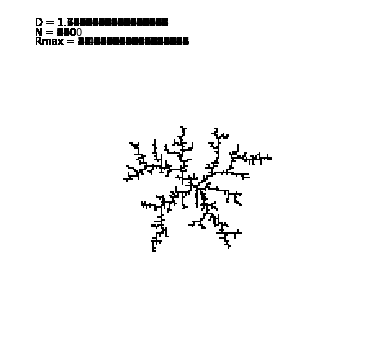

In [20]:
n = 1
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ims = []

rmax = 1
rkill = 50*rmax
rd = rmax + 10
rs = rmax + 5
D = 1

stop = 0
rx, ry = occupy()
while stop == 0:
    checker = check(rx, ry)
    
    if checker == 'k': 
        rx, ry = occupy()
        rx, ry = jump(rx, ry)      

    if checker == 'j':
        rx, ry = jump(rx, ry)

    if checker == 'c':
        rx, ry = circle_jump(rx, ry)
    
    if checker == 'a':
        stop = aggregate(rx, ry)
        n += 1
        
        if rmax == 1:
            D = 1
        elif rmax != 1:
            D = np.log(n)/np.log(rmax)
        #update(rmax)
        
        rkill = 50*rmax
        rd = rmax + 10
        rs = rmax + 5
        
        if n%10 == 0:
            im = ax.matshow(box , cmap=cm.gray_r, animated=True)
            ax.axis('off')
            a = ax.annotate("D = " + str(D), xy = (0.5,0.5))
            b = ax.annotate("N = " + str(n), xy = (0.5,0.5+6))
            c = ax.annotate("Rmax = " + str(rmax), xy = (0.5,0.5+12))
            ims.append([im, a,b,c])
        
        rx, ry = occupy()
        rx, ry = jump(rx, ry)
    if n > 1000: 
        stop = 1

In [21]:
ani = animate.ArtistAnimation(fig, ims, interval=150, blit=True)

In [22]:
HTML(ani.to_html5_video())